## Import necessary libraies

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Read breast cancer dataset

In [ ]:
wisconsin_dataset = datasets.load_breast_cancer()

In [ ]:
X = wisconsin_dataset.data
y = wisconsin_dataset.target

### Split data into training and testing data

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

### Perform standardization of data
               cur_value - mean
    new_value = -----------------
                    std_dev

In [ ]:
scalar = StandardScaler()
x_train = scalar.fit_transform(x_train)
x_test = scalar.transform(x_test)


### Defining optimizers and loss functions

In [ ]:
optimizers = ['Adam','rmsprop', 'sgd']
losses = ['mean_squared_error', 'binary_crossentropy']

### Function to draw learning curve

In [ ]:
def plot_learningCurve(history, epoch):

  plt.figure(figsize=(10,4))
  epoch_range = range(1, epoch+1)
  plt.subplot(1,2,1)
  plt.plot(epoch_range, history.history['accuracy'],)
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('epoch')
  plt.legend(['tarin', 'val'], loc='upper left')
  
  plt.subplot(1,2,2)
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('epoch')
  plt.legend(['tarin', 'val'], loc='upper left')
  plt.tight_layout()
  plt.show()

In [ ]:
accuracy_list=[]

### Build model

1. ANN-SLP

In [ ]:
model = tf.keras.Sequential([
     tf.keras.layers.Dense(32, activation='relu', input_shape=(30,)),
     tf.keras.layers.Dense(1, activation='sigmoid')                                              
    ])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                992       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 1,025
Trainable params: 1,025
Non-trainable params: 0
_________________________________________________________________


In [ ]:
hist = {}
for opt in optimizers:
  for loss in losses:
    model = tf.keras.Sequential([
     tf.keras.layers.Dense(32, activation='relu', input_shape=(30,)),
     tf.keras.layers.Dense(1, activation='sigmoid')                                              
    ])
    model.compile(optimizer=opt, loss=loss, metrics='accuracy')
    history = model.fit(x_train, y_train, epochs=250, verbose=0,validation_data=(x_test, y_test))
    print('{}-{}'.format(opt,loss))
    hist['{}-{}'.format(opt,loss)] = history

Adam-mean_squared_error
Adam-binary_crossentropy
rmsprop-mean_squared_error
rmsprop-binary_crossentropy
sgd-mean_squared_error
sgd-binary_crossentropy


In [ ]:
#creating model
model = tf.keras.Sequential([
     tf.keras.layers.Dense(32, activation='relu', input_shape=(30,)),
     tf.keras.layers.Dense(1, activation='sigmoid')                                              
    ])
#compiling model
model.compile(optimizer=opt, loss=loss, metrics='accuracy')
#training model
model.fit(x_train, y_train, epochs=250, verbose=0,validation_data=(x_test, y_test))

Adam-mean_squared_error


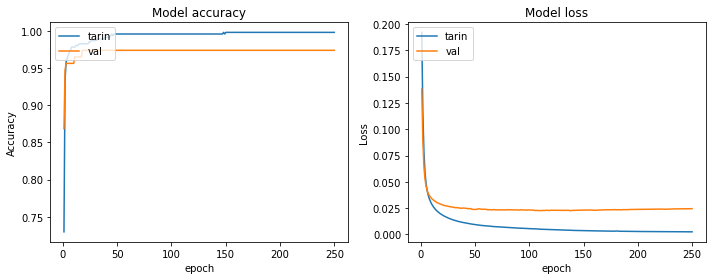

Adam-binary_crossentropy


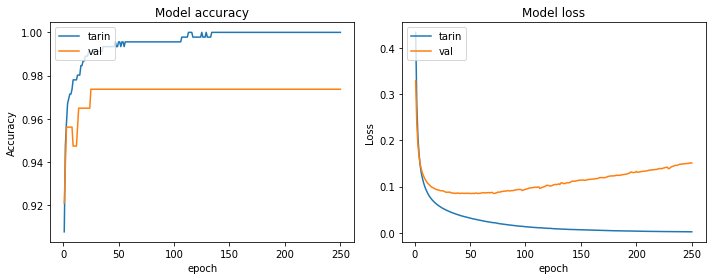

rmsprop-mean_squared_error


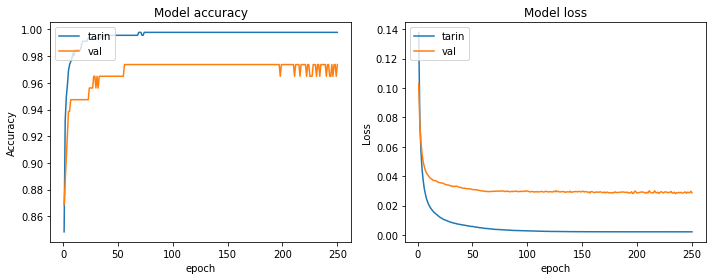

rmsprop-binary_crossentropy


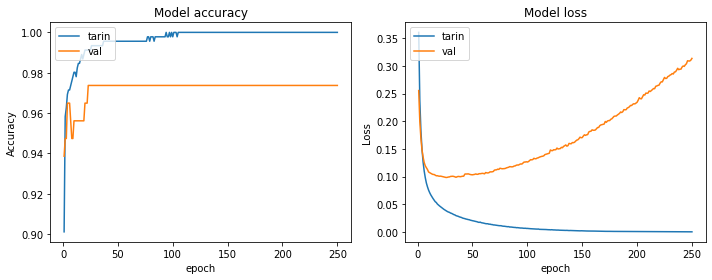

sgd-mean_squared_error


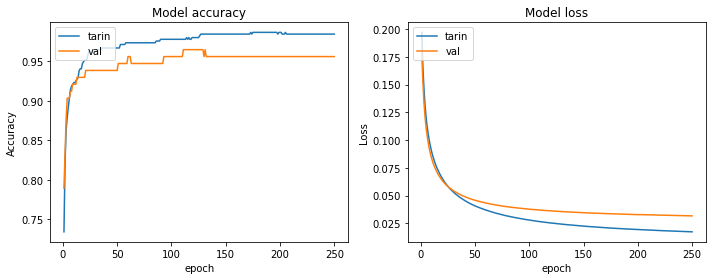

sgd-binary_crossentropy


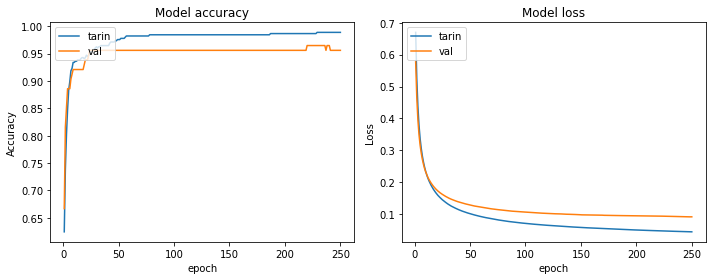

In [ ]:
for h in hist:
  print(h)
  plot_learningCurve(hist[h], hist[h].params['epochs'])

2. ANN-MLP

In [ ]:
# creating model
model = tf.keras.Sequential([
     tf.keras.layers.Dense(32, activation='relu', input_shape=(30,)),
     tf.keras.layers.Dense(64, activation='relu'),
     tf.keras.layers.Dense(1, activation='sigmoid')                                              
  ])
#compiling model
model.compile(optimizer=opt, loss=loss, metrics='accuracy')
# training model
model.fit(x_train, y_train, epochs=250, verbose=0,validation_data=(x_test, y_test))
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 32)                992       
_________________________________________________________________
dense_17 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 65        
Total params: 3,169
Trainable params: 3,169
Non-trainable params: 0
_________________________________________________________________


In [ ]:
hist = {}
for opt in optimizers:
  for loss in losses:
    model = tf.keras.Sequential([
     tf.keras.layers.Dense(32, activation='relu', input_shape=(30,)),
     tf.keras.layers.Dense(64, activation='relu'),
     tf.keras.layers.Dense(1, activation='sigmoid')                                              
    ])
    model.compile(optimizer=opt, loss=loss, metrics='accuracy')
    history = model.fit(x_train, y_train, epochs=250, verbose=0,validation_data=(x_test, y_test))
    print('{}-{}'.format(opt,loss))
    hist['{}-{}'.format(opt,loss)] = history

Adam-mean_squared_error
Adam-binary_crossentropy
rmsprop-mean_squared_error
rmsprop-binary_crossentropy
sgd-mean_squared_error
sgd-binary_crossentropy


Adam-mean_squared_error


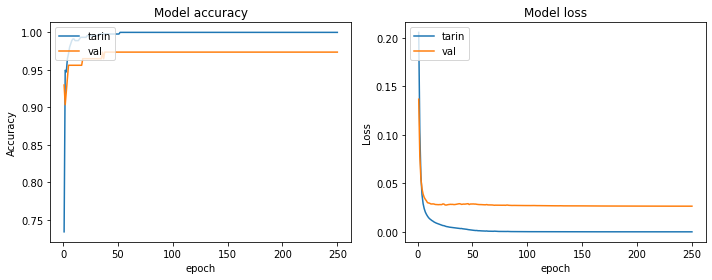

Adam-binary_crossentropy


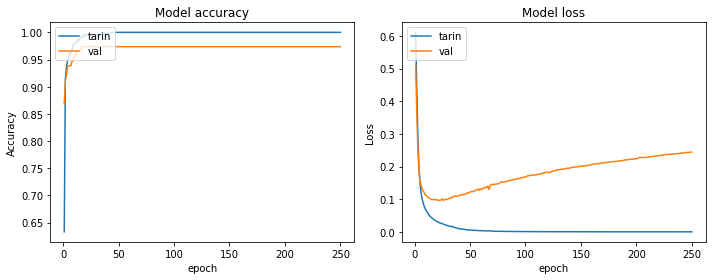

rmsprop-mean_squared_error


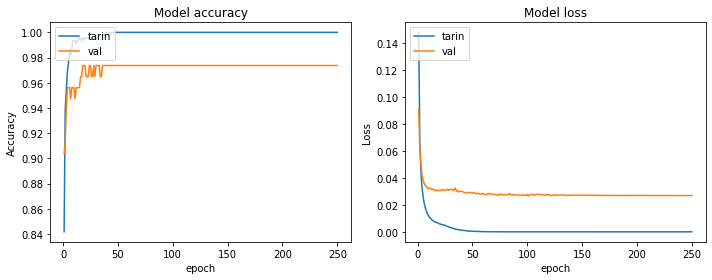

rmsprop-binary_crossentropy


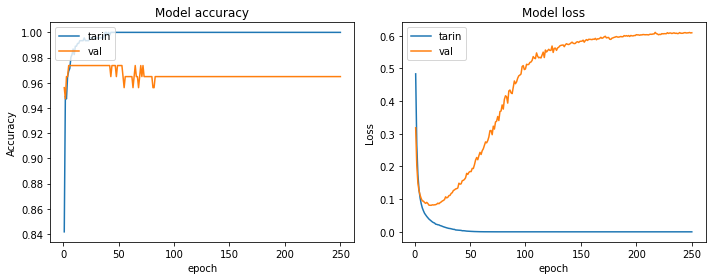

sgd-mean_squared_error


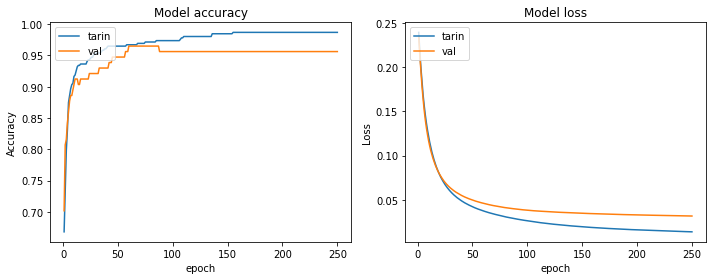

sgd-binary_crossentropy


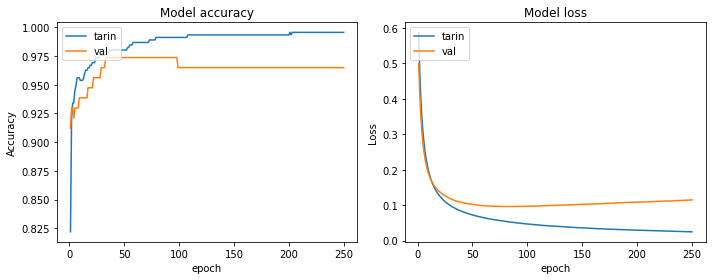

In [ ]:
for h in hist:
  print(h)
  plot_learningCurve(hist[h], hist[h].params['epochs'])

ANN - MLP with Convolution Layer

In [ ]:
x_train_new = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test_new = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [ ]:
np.amax(x_train_new)

11.914738594310922

Model - 1 (without dropout and batch normalization)

In [ ]:
# creating model
model = tf.keras.Sequential([
tf.keras.layers.Conv1D(filters =  16, kernel_size=2, activation='relu',input_shape=(30,1)),
tf.keras.layers.Conv1D(filters = 32, kernel_size=2, activation='relu'),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(64, activation='relu'),
tf.keras.layers.Dense(1, activation='sigmoid')                                              
])
# compile model
model.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.binary_crossentropy, metrics='accuracy')
# train model
model.fit(x_train_new, y_train, epochs=50, verbose=0,validation_data=(x_test_new, y_test))
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 29, 16)            48        
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 28, 32)            1056      
_________________________________________________________________
flatten (Flatten)            (None, 896)               0         
_________________________________________________________________
dense_37 (Dense)             (None, 64)                57408     
_________________________________________________________________
dense_38 (Dense)             (None, 1)                 65        
Total params: 58,577
Trainable params: 58,577
Non-trainable params: 0
_________________________________________________________________


In [ ]:
hist={}
model = tf.keras.Sequential([
tf.keras.layers.Conv1D(filters =  16, kernel_size=2,activation='relu',input_shape=(30,1)),
tf.keras.layers.Conv1D(filters = 32, kernel_size=2,activation='relu'),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(64, activation='relu'),
tf.keras.layers.Dense(1, activation='sigmoid')                                              
])
model.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.binary_crossentropy, metrics='accuracy')
history = model.fit(x_train_new, y_train, epochs=50, verbose=0,validation_data=(x_test_new, y_test))

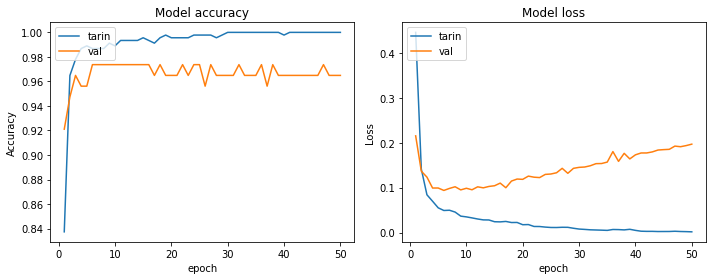

In [ ]:
plot_learningCurve(history, history.params['epochs'])

Model - 2 (with drop out and batch normalization)

In [ ]:
# creating model
model = tf.keras.Sequential([
  tf.keras.layers.Conv1D(filters = 16, kernel_size=2,activation='relu',input_shape=(30,1)),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(0.2),
  
  tf.keras.layers.Conv1D(filters = 32, kernel_size=2,activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(0.5),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')                                            
])
# compiling model
model.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.binary_crossentropy, metrics='accuracy')
# training model
model.fit(x_train_new, y_train, epochs=50, verbose=0,validation_data=(x_test_new, y_test))
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (None, 29, 16)            48        
_________________________________________________________________
batch_normalization (BatchNo (None, 29, 16)            64        
_________________________________________________________________
dropout (Dropout)            (None, 29, 16)            0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 28, 32)            1056      
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 32)            128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 32)            0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 896)             

In [ ]:
hist = {}

model = tf.keras.Sequential([
  tf.keras.layers.Conv1D(filters = 16, kernel_size=2,activation='relu',input_shape=(30,1)),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(0.2),
  
  tf.keras.layers.Conv1D(filters = 32, kernel_size=2,activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(0.5),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')                                            
])
model.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.binary_crossentropy, metrics='accuracy')
history = model.fit(x_train_new, y_train, epochs=50, verbose=0,validation_data=(x_test_new, y_test))

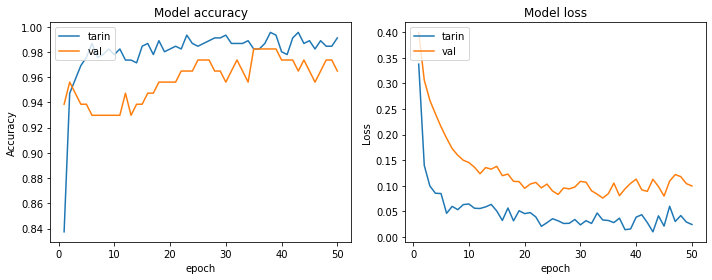

In [ ]:
plot_learningCurve(history, history.params['epochs'])

In [ ]:
hist = {}

model = tf.keras.Sequential([
  tf.keras.layers.Conv1D(filters = 16, kernel_size=2,activation='relu',input_shape=(30,1)),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(0.2),
  
  tf.keras.layers.Conv1D(filters = 32, kernel_size=2,activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(0.5),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')                                            
])
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss=tf.keras.losses.binary_crossentropy, metrics='accuracy')
history = model.fit(x_train_new, y_train, epochs=50, verbose=0,validation_data=(x_test_new, y_test))

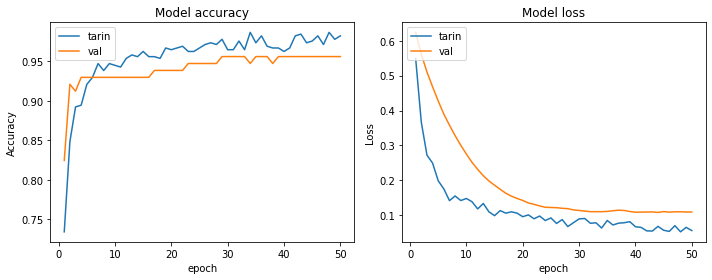

In [ ]:
plot_learningCurve(history, history.params['epochs'])